散点密度图（scatter density plot），也叫热力散点图；
科研中经常用于比较两个变量之间的关系，同时用颜色表示点的密度；
是一种高效、视觉友好、能同时表达点分布密度与变量关系的可视化方式，尤其适合海量数据的回归拟合与模型误差分析。

说点你不知道的：
横轴通常代表真实值（观测值）；纵轴表示模拟值；
图中：
1、拟合线（多项式或线性）表示变量间的函数关系
2、1:1 线（对角线）用于判断偏差（是否高估或低估）
3、R²、RMSE、MAE、r等指标量化误差与拟合度


In [1]:
import numpy as np
from numpy import polyfit, poly1d
import matplotlib as mpl
from matplotlib import cm
from matplotlib import ticker
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.stats import gaussian_kde


In [2]:
# 固定 numpy 的随机种子
np.random.seed(2024)

# 构造二维数据 x 和 y
x = np.random.normal(loc=0.0, scale=1.0, size=1000)
y = x + np.random.normal(loc=0.1, scale=1.0, size=1000)

# 核密度估计
x_and_y = np.vstack([x, y])
kde = gaussian_kde(x_and_y)
z = kde(x_and_y)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

is_cbar = True

Correlation coefficients：
[[1.         0.70960371]
 [0.70960371 1.        ]]
R^2： 0.5035374188098842
RMSE (root mean square error): 1.0230
MAE (mean absolute error): 0.8192


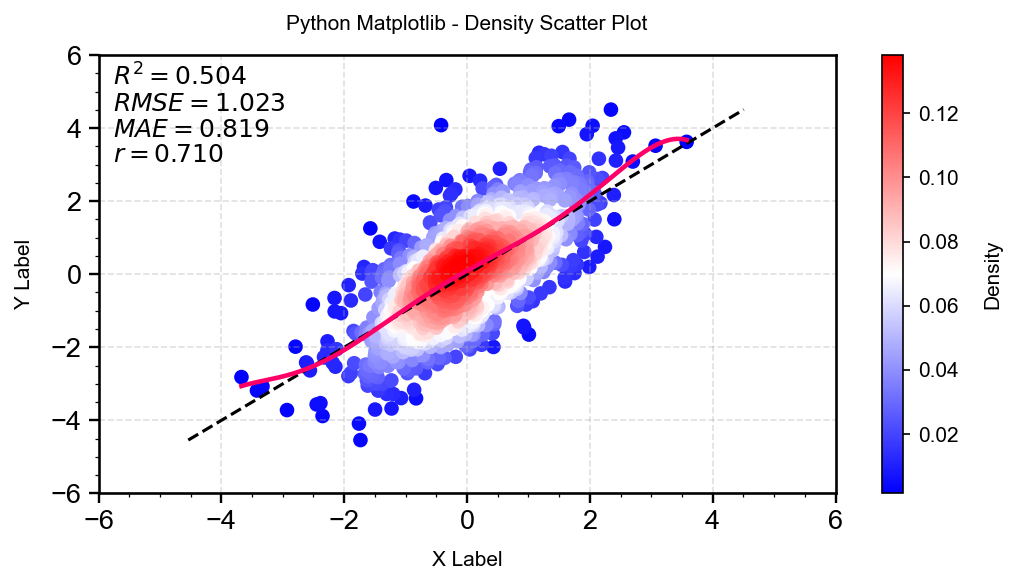

In [3]:
# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(7, 4), dpi=150)

# cmap: bwr、Spectral_r、viridis_r、spring、gist_rainbow_r、RdBu_r
# 可设置的 colormaps - https://matplotlib.org/tutorials/colors/colormaps.html
my_cmap = "bwr"

# 绘制密度散点图
ax.scatter(x, y, c=z, cmap=my_cmap)

# 用 7 次多项式拟合，调用 poly1d 方法得到多项式系数。
y_fit = polyfit(x, y, 7)
y_fit_1d = np.poly1d(y_fit)
y_hat = np.polyval(y_fit, x)

# 计算相关系数和 R^2
print('Correlation coefficients：')
print(np.corrcoef(y_hat, y))
correlation = np.corrcoef(y_hat, y)[0, 1]
R_square = correlation ** 2
print("R^2：", R_square)

# RMSE = sqrt(mean squared error)
rmse = np.sqrt(np.mean((y_hat - y) ** 2))
print(f"RMSE (root mean square error): {rmse:.4f}")

# MAE = mean absolute error
mae = np.mean(np.abs(y_hat - y))
print(f"MAE (mean absolute error): {mae:.4f}")


min_val = min(np.min(x), np.min(y))
max_val = max(np.max(x), np.max(y))
ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1.5, label="1:1 Line")



xtick = np.linspace(min(x), max(x), 1000)
# 拟合的多项式曲线
plt.plot(xtick, y_fit_1d(xtick), color="#FF0066", lw=2.2)

# 坐标轴刻度的数值使用 Latin Modern Math 字体
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontproperties("Arial") for label in labels]
[label.set_color('black') for label in labels]

# 设置坐标轴刻度
plt.tick_params(axis='x', direction='out', labelsize=13, length=4.6, width=1.15)
plt.tick_params(axis='y', direction='out', labelsize=13, length=4.6, width=1.15)

# 展示 X 和 Y 轴的子刻度
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

# 颜色条的设置：刻度、字体、字号等
if is_cbar:
    norm = colors.Normalize(vmin=np.min(z), vmax=np.max(z))
    cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=my_cmap), ax=ax)

    cbar.ax.set_ylabel("Density", fontproperties="Arial", labelpad=12)
    cbar.ax.tick_params(labelsize=12)

    labels = cbar.ax.get_xticklabels() + cbar.ax.get_yticklabels()
    [label.set_fontproperties("Arial") for label in labels]
    [label.set_color('black') for label in labels]
    
    tick_locator = ticker.MaxNLocator(nbins=8)
    cbar.locator = tick_locator
    cbar.update_ticks()

# 设置 X 轴和 Y 轴的刻度值范围
ax.set_xlim(left=-6, right=6.0000001)
ax.set_xticks(np.arange(-6, 6.000001, step=2.0))
ax.set_ylim(bottom=-6, top=6.0000001)
ax.set_yticks(np.arange(-6, 6.000001, step=2.0))

# 画图对象周围的框的加粗一点
lw = 1.25
ax.spines["right"].set_linewidth(lw)
ax.spines["left"].set_linewidth(lw)
ax.spines["top"].set_linewidth(lw)
ax.spines["bottom"].set_linewidth(lw)

# 设置 X 轴和 Y 轴的标签、字体、刻度和刻度标签在内的坐标轴边界框中的间距
plt.xlabel("X Label", fontproperties="Arial", labelpad=8)
plt.ylabel("Y Label", fontproperties="Arial", labelpad=8)

# 设置标题 字体 大小 以及距绘图对象的距离
plt.title("Python Matplotlib - Density Scatter Plot",
          fontproperties="Arial", pad=12
         )

# 添加指标数据到左上角
text_str = (
    rf"$R^2 = {R_square:.3f}$" + "\n" +
    rf"$RMSE = {rmse:.3f}$" + "\n" +
    rf"$MAE = {mae:.3f}$" + "\n" +
    rf"$r = {correlation:.3f}$"
)
ax.text(
    0.02, 0.98, text_str,
    transform=ax.transAxes,
    fontsize=12, fontweight="bold", verticalalignment='top',
    fontproperties="Times New Roman"
)


# 显示网格  虚线和透明度
plt.grid(alpha=0.360, ls="--", which="major", color="#A9A9A9")
# 紧凑布局
plt.tight_layout()

# plt.savefig("./Figures/密度散点图.png", dpi=300, bbox_inches="tight")
plt.show()
